### Exploratory Analysis 1 (2020-12-17)

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',95)
pd.set_option('display.max_rows',None)
import pickle
import re
import datetime
import seaborn as sns
from matplotlib.pyplot import *

In [2]:
# Opening the pickled file
f = open('df5.pkl', 'rb')
df5 = pickle.load(f)
f.close()

In [3]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20095649 entries, 0 to 20095648
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   invoice/item_number  category      
 1   date                 datetime64[ns]
 2   store_number         int64         
 3   city                 object        
 4   zip_code             category      
 5   county_number        float64       
 6   county               category      
 7   item_number          category      
 8   item_description     object        
 9   state_bottle_cost    float64       
 10  state_bottle_retail  float64       
 11  bottles_sold         float64       
 12  sale_dollars         float64       
 13  volume_sold_liters   float64       
 14  store_name           object        
 15  cat_name             object        
 16  open_store           object        
 17  store_type           object        
dtypes: category(4), datetime64[ns](1), float64(6), int64(1), obj

In [4]:
df5.isna().sum()

invoice/item_number           0
date                          0
store_number                  0
city                      79926
zip_code                  79971
county_number            156731
county                   156729
item_number                   0
item_description              0
state_bottle_cost      17638050
state_bottle_retail    17474210
bottles_sold            4399777
sale_dollars                  0
volume_sold_liters       589824
store_name                    0
cat_name                      0
open_store                    0
store_type                    0
dtype: int64

In [5]:
df5.head()

,invoice/item_number,date,store_number,city,zip_code,county_number,county,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,store_name,cat_name,open_store,store_type
0,S04763500007,2012-03-27,2534,urbandale,50322,77.0,Polk,11788,black velvet,NaN,NaN,6.0,94.02,10.50,hy-vee drugtown / urbandale,whiskey,closed,supermarket
1,S27474100012,2015-08-25,4924,nashua,50658,19.0,Chickasaw,89194,jose cuervo especial reposado flask,NaN,NaN,4.0,33.00,1.50,abby lea's,tequila,closed,retail store
2,S10731000040,2013-02-21,4652,davenport,52803,82.0,Scott,34449,ketel one citroen,NaN,NaN,2.0,40.48,1.50,brady mart food & liquor,vodka,open,convenience store
3,S17037900080,2014-01-27,4794,burlington,52601,29.0,Des Moines,32236,seagrams extra dry gin,NaN,NaN,1.0,8.99,0.75,smokin' joe's #17 tobacco and liquor outlet,gin,open,retail store
4,S14396900023,2013-09-09,2647,cedar rapids,52411,57.0,Linn,13038,canadian reserve whisky,NaN,NaN,6.0,80.94,10.50,hy-vee #7 / edgewood cedar rapids,whiskey,open,supermarket


In [6]:
sum(df5['sale_dollars'] == np.inf)

0

In [7]:
total_sales = df5.groupby('store_type')['sale_dollars'].sum().sort_values(ascending = False) #series
total_sales.reset_index()

,store_type,sale_dollars
0,supermarket,1.192129e+09
1,retail store,7.746953e+08
2,big box,4.363036e+08
3,convenience store,2.792348e+08
4,drugstore,3.914230e+07


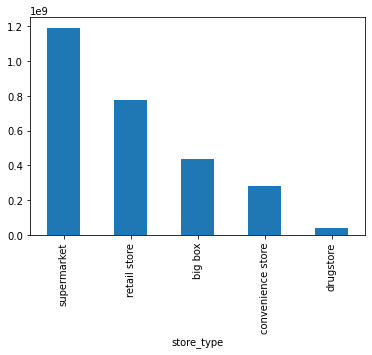

In [8]:
total_sales.plot.bar()

In [9]:
# Total liquor sales by year 
ttl_sales_year = df5.groupby([pd.Grouper(key='date',freq='Y')])['sale_dollars'].sum().reset_index().round(2)
ttl_sales_year['sales (M)'] = ttl_sales_year['sale_dollars']/1000000

In [ ]:
ttl_sales_year

In [10]:
# Total sales by year and store type 
ttl_sales_year_type = df5.groupby([pd.Grouper(key='date',freq='Y'), 'store_type'])['sale_dollars'].sum().reset_index().round(2)

In [11]:
ttl_sales_year_type['year'] = ttl_sales_year_type['date'].dt.year
ttl_sales_year_type['sales (M)'] = round((ttl_sales_year_type['sale_dollars']/1000000),1)
ttl_sales_year_type

,date,store_type,sale_dollars,year,sales (M)
0,2012-12-31,big box,4.516591e+07,2012,45.2
1,2012-12-31,convenience store,1.894603e+07,2012,18.9
2,2012-12-31,drugstore,3.063227e+06,2012,3.1
3,2012-12-31,retail store,7.749491e+07,2012,77.5
4,2012-12-31,supermarket,1.105332e+08,2012,110.5
5,2013-12-31,big box,4.534055e+07,2013,45.3
6,2013-12-31,convenience store,2.120881e+07,2013,21.2
7,2013-12-31,drugstore,4.350683e+06,2013,4.4
8,2013-12-31,retail store,7.662367e+07,2013,76.6
9,2013-12-31,supermarket,1.105801e+08,2013,110.6


In [ ]:
# ttl_sales_year_type.to_csv('total_sales.csv')

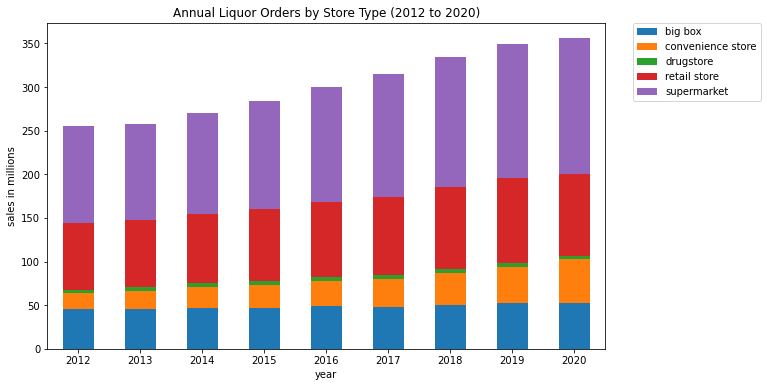

In [35]:
# Plotting the annual sales by store type
plt.rcParams['figure.figsize'] = (10,6)
ttl_sales_year_type.pivot(index = 'year', columns = 'store_type', values = 'sales (M)').plot.bar(stacked = True, rot = 0)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.title('Annual Liquor Orders by Store Type (2012 to 2020)')
plt.ylabel('sales in millions')
plt.savefig('sales_total.png')

In [13]:
# Total bottle sold sales by year and store type 
ttl_bottles_year_type = df5.groupby([pd.Grouper(key='date',freq='Y'), 'store_type'])['bottles_sold'].sum().reset_index()

In [14]:
ttl_bottles_year_type['year'] = ttl_bottles_year_type['date'].dt.year
ttl_bottles_year_type['bottles (M)'] = round((ttl_bottles_year_type['bottles_sold']/1000000),1)
ttl_bottles_year_type

,date,store_type,bottles_sold,year,bottles (M)
0,2012-12-31,big box,2356822.0,2012,2.4
1,2012-12-31,convenience store,1591797.0,2012,1.6
2,2012-12-31,drugstore,182772.0,2012,0.2
3,2012-12-31,retail store,4934898.0,2012,4.9
4,2012-12-31,supermarket,6656301.0,2012,6.7
5,2013-12-31,big box,2308177.0,2013,2.3
6,2013-12-31,convenience store,1840590.0,2013,1.8
7,2013-12-31,drugstore,264860.0,2013,0.3
8,2013-12-31,retail store,4828089.0,2013,4.8
9,2013-12-31,supermarket,6486675.0,2013,6.5


Text(0, 0.5, 'bottles in millions')

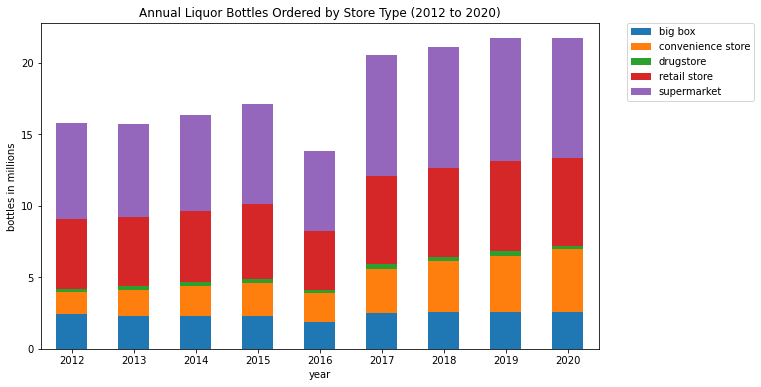

In [15]:
# Plotting the annual bottles sold by store type
plt.rcParams['figure.figsize'] = (10,6)
ttl_bottles_year_type.pivot(index = 'year', columns = 'store_type', values = 'bottles (M)').plot.bar(stacked = True, rot = 0)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.title('Annual Liquor Bottles Ordered by Store Type (2012 to 2020)')
plt.ylabel('bottles in millions')

In [16]:
# Count of stores annualized
ttl_store_count = df5.groupby([pd.Grouper(key='date',freq='Y'), 'store_type'])['store_number'].nunique().reset_index()

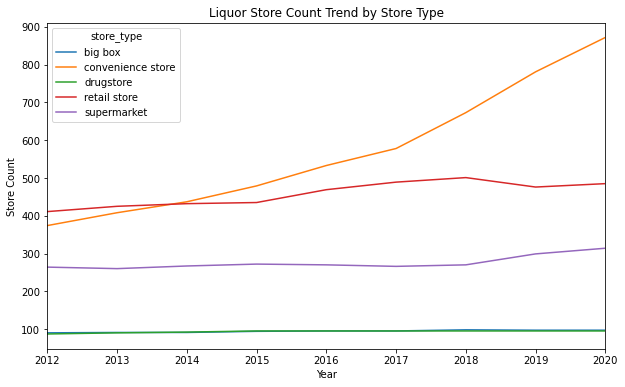

In [33]:
# this gives a time series, 5 different and can plot them (line)
ttl_store_count.pivot(index = 'date', columns = 'store_type', values = 'store_number').plot(kind = 'line')
plt.title('Liquor Store Count Trend by Store Type')
plt.ylabel('Store Count')
plt.xlabel('Year')
plt.savefig('growth.png')

In [ ]:
# ttl_store_count.to_csv('store_growth.csv')

In [18]:
# Total liquor category sales by year 
ttl_cat_sales = df5.groupby([pd.Grouper(key='date',freq='Y'), 'cat_name'])['sale_dollars'].sum().reset_index().round(2)
ttl_cat_sales['sales (M)'] = ttl_cat_sales['sale_dollars']/1000000

In [19]:
ttl_cat_sales['year'] = ttl_cat_sales['date'].dt.year
# ttl_cat_sales

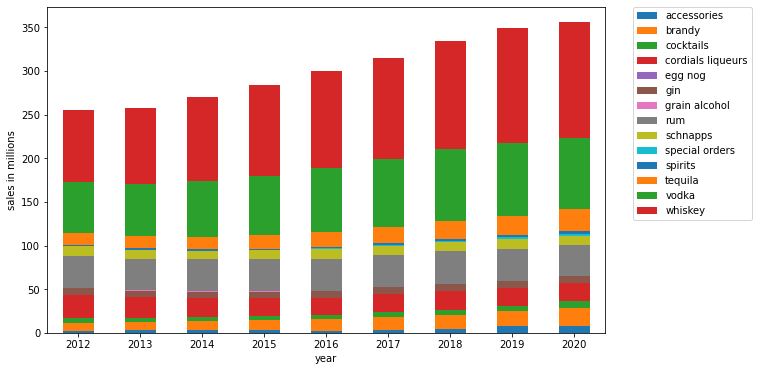

In [32]:
# Plotting the annual sales by store type
plt.rcParams['figure.figsize'] = (10,6)
ttl_cat_sales.pivot(index = 'year', columns = 'cat_name', values = 'sales (M)').plot.bar(stacked = True, rot = 0)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
# plt.title('Annual Liquor Orders by Category (2012 to 2020)')
plt.ylabel('sales in millions')
plt.savefig('bar_category.png')

In [ ]:
# matplotlib.pyplot.boxplot(ttl_cat_sales, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, data=None)

In [ ]:
avg_sales_year_item = df5.groupby('item_description')['sale_dollars'].sum().reset_index().round(2).sort_values(by = 'sale_dollars', ascending = True).tail(10)
avg_sales_year_item['sales (M)'] = round((avg_sales_year_item['sale_dollars']/9/1000000),1)
avg_sales_10 = avg_sales_year_item.head(10)
avg_sales_10

In [ ]:
# Writing/saving as a pickled file 
# f = open('df5.pkl', 'wb')
# pickle.dump(df5, f)
# f.close()

In [ ]:
fig, ax = plt.subplots(figsize =(14, 7))
ax.barh(avg_sales_10['item_description'], avg_sales_10['sales (M)'], )
plt.title('Top 10 Liquor Items Annualized')
plt.ylabel('product description')
plt.xlabel('sales in millions')

In [ ]:
avg_sales_10.pivot(index = 'item_description', columns = 'sales (M)')

In [ ]:
avg_sales_10.pivot(index = 'item_description', columns = 'sales (M)',  values = 'sales (M)').plot.barh()
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.title('Top 10 Liquor Items Annualized')
plt.ylabel('product description')
plt.xlabel('sales in millions')

In [ ]:
# avg_sales_10.pivot(index = 'sales (M)', columns = 'sales (M)',  values = 'item_description').plot.barh()
# plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
# plt.title('Top 10 Liquor Items Annualized')
# plt.ylabel('product description')
# plt.xlabel('sales in millions')

In [ ]:
df5['county'].value_counts()

In [ ]:
df5.groupby(['county'])['sale_dollars'].sum().reset_index()

In [ ]:
ttl_store_cat = df5.groupby([pd.Grouper(key='date',freq='Y'), 'store_type', 'cat_name'])['sale_dollars'].mean().reset_index()
# ttl_store_cat['sales'] = ttl_store_cat['sales_dollars']/1000

In [ ]:
ttl_store_cat.head()

In [ ]:
ttl_store_cat.to_csv('ttl_store_cat.csv')